In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)
import numpy as np
import math
import pandas
from matplotlib import pyplot as plt
from PIL import Image
import os


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Решил отдельно натренировать модель для трансформации результата в более четкий.

In [3]:
locloc = "BigData\\" 
namename = "TestBigPastel"
all_photos = np.load(locloc + namename + 'Photos.npy')
all_normals = np.load(locloc + namename + 'Normals.npy')
all_masks = np.load(locloc + namename + 'Masks.npy')

In [4]:
myModel =   tf.keras.models.load_model("TrainedModels/big_normals.keras")

In [5]:
input = all_photos[0].reshape((1,64,64,3))

In [12]:
normals = myModel.predict(all_photos)

214/214 [==============================] - 1s 4ms/step


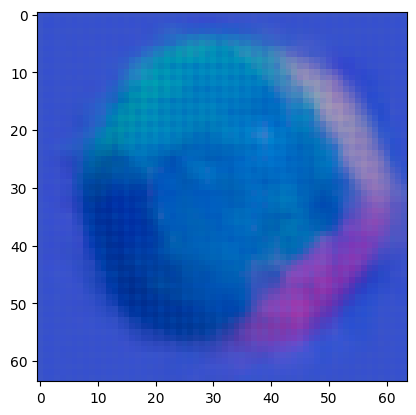

In [7]:
#plt.imshow(normals[0])

In [13]:
np.save("blurry_predictions.npy", normals)

In [8]:
# Решил что не буду торопиться с этим. Сначала попробую натренировать модель что выдает четкий результат. 

In [ ]:
del all_photos; del all_normals; del all_masks; del normals;

In [16]:
locloc = "BigData\\" 
namename = "TrainBigPastel"
all_photos = np.load(locloc + namename + 'Photos.npy')
all_normals = np.load(locloc + namename + 'Normals.npy')
all_masks = np.load(locloc + namename + 'Masks.npy')

In [17]:
myModel =   tf.keras.models.load_model("TrainedModels/big_normals.keras")

1/1 [==============================] - 0s 22ms/step


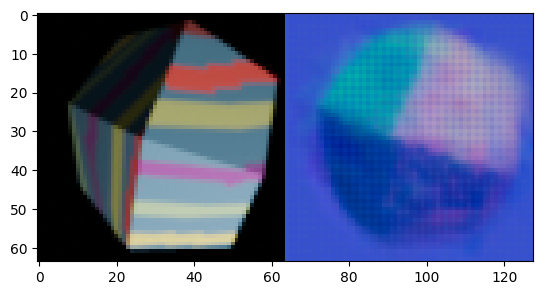

In [20]:
test_index = 60
photo = all_photos[test_index].reshape((1,64,64,3))
normals = myModel.predict(photo)[0]
plt.imshow(np.concatenate([photo[0], normals], axis = 1).astype("float32"))

In [21]:
normals = myModel.predict(all_photos)

321/321 [==============================] - 1s 4ms/step


In [22]:
np.save("big_blurry_predictions.npy", normals)